Original:
- Surapon Nonesung (https://opentyphoon.ai/blog/th/typhoon-ocr-release)
- https://github.com/scb-10x/typhoon-ocr

Modified: Ta.Kong (07/02/2026)

### Install Required Packages (Do This First)

Install the required package `poppler-utils`, which is not available in the Google Colab environment, to enable the built-in **PDF OCR feature** in Typhoon OCR 1.5.

> **No installation is required if you only use OCR on PNG/JPEG images, or if you manually preprocess PDFs into PNG/JPEG.**

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 0s (453 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


**Important:
The `poppler-utils` package requires a runtime restart.**
- You can restart the runtime using

  - the code below (**it may show that your session crashed --- please ignore it**).
  - or manually restart via `Menu Tab` → `Runtime` → `Restart session`.
- **After restarting**, you can continue running the remaining cells without re-running the previous cells.

In [ ]:
import os
os.kill(os.getpid(), 9)

Install the required package `typhoon-ocr` to call the Typhoon API.

In [ ]:
!pip install typhoon-ocr==0.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 15.6 MB/s eta 0:00:00


## Optical Character Recognition (OCR)

> Optical Character Recognition (OCR) is a technology that converts text in images—such as scanned documents, PDFs, or photos—into machine-readable and searchable digital text. It enables automated text extraction for document digitization, search, and data processing.

`Traditional OCR vs. VLM-based OCR`

- Traditional OCR systems typically rely on CNNs for visual feature extraction and RNNs or Transformers for sequence decoding. While effective for clean inputs, they often struggle with complex layouts and real-world documents.

- Vision-Language Models (VLMs) extend OCR by jointly reasoning over vision and language, enabling the system to understand what the text is, where it appears, and its role within the document.

## Typhoon OCR

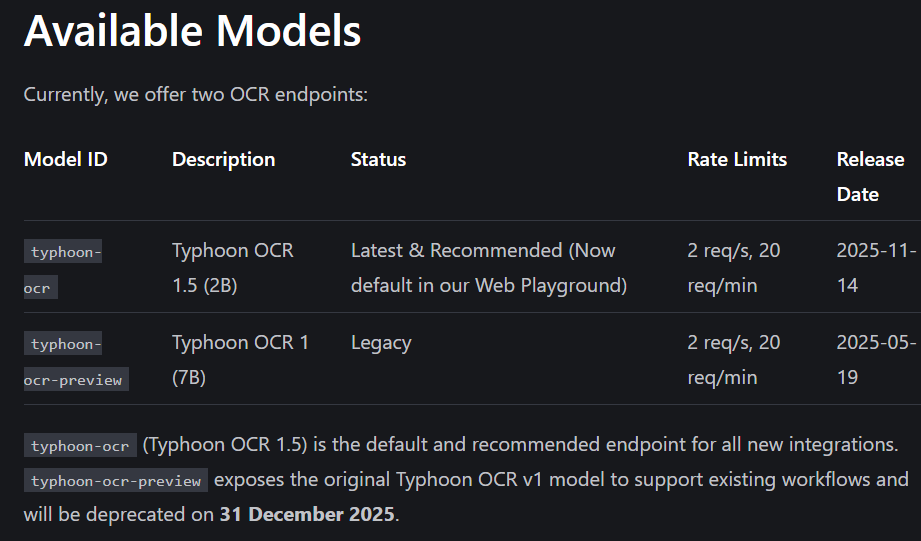

[ref: https://docs.opentyphoon.ai/en/]

This notebook uses **Typhoon OCR 1.5 (2B)** (launched November 14, 2025, by **SCB10X**), which is developed on top of **Qwen3-VL 2B**, a Vision-Language Model designed for robust document understanding.

### Key Capabilities

Typhoon OCR goes beyond plain text extraction.  
It preserves **document structure and layout** by returning rich, structured outputs, including:

- **Markdown** – general text content  
- **HTML** – tables, including complex layouts and merged cells  
- **`<figure>`** – images, charts, and diagrams  
  - *Example:*  
    `<figure> A bar chart comparing domestic and export revenue growth between Q1 and Q2 2025. </figure>`
- **LaTeX** – mathematical expressions  
  - *Example:*  
    `$$ \text{Profit Margin} = \frac{\text{Net Profit}}{\text{Total Revenue}} \times 100 $$`
- **`<page_number>`** – page indexing  
  - *Example:*  
    `<page_number>1</page_number>`

### Supported File Formats:
- Images: `PNG`, `JPEG`
- Documents: `PDF`

## Data Preparation

Load Image 1

In [ ]:
!wget https://www.finearts.go.th/storage/contents/2024/01/detail_image/Je55JmRtmkhgmkWf2G5qBsoK71TdJy51Ly0POYrG.jpg

--2026-02-07 05:24:03--  https://www.finearts.go.th/storage/contents/2024/01/detail_image/Je55JmRtmkhgmkWf2G5qBsoK71TdJy51Ly0POYrG.jpg
Resolving www.finearts.go.th (www.finearts.go.th)... 58.181.189.220, 2405:a000:f:a:58:181:189:220
Connecting to www.finearts.go.th (www.finearts.go.th)|58.181.189.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 899817 (879K) [image/jpeg]
Saving to: ‘Je55JmRtmkhgmkWf2G5qBsoK71TdJy51Ly0POYrG.jpg’

Je55JmRtmkhgmkWf2G5 100%[===================>] 878.73K   820KB/s    in 1.1s    

2026-02-07 05:24:05 (820 KB/s) - ‘Je55JmRtmkhgmkWf2G5qBsoK71TdJy51Ly0POYrG.jpg’ saved [899817/899817]



Load Image 2

In [ ]:
!wget https://static.naewna.com/uploads/news/gallery/source/521538.jpg

--2026-02-07 05:24:07--  https://static.naewna.com/uploads/news/gallery/source/521538.jpg
Resolving static.naewna.com (static.naewna.com)... 103.233.192.243
Connecting to static.naewna.com (static.naewna.com)|103.233.192.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184757 (180K) [image/jpeg]
Saving to: ‘521538.jpg’

521538.jpg          100%[===================>] 180.43K   475KB/s    in 0.4s    

2026-02-07 05:24:08 (475 KB/s) - ‘521538.jpg’ saved [184757/184757]



See Image 1 (Stories/Tales)

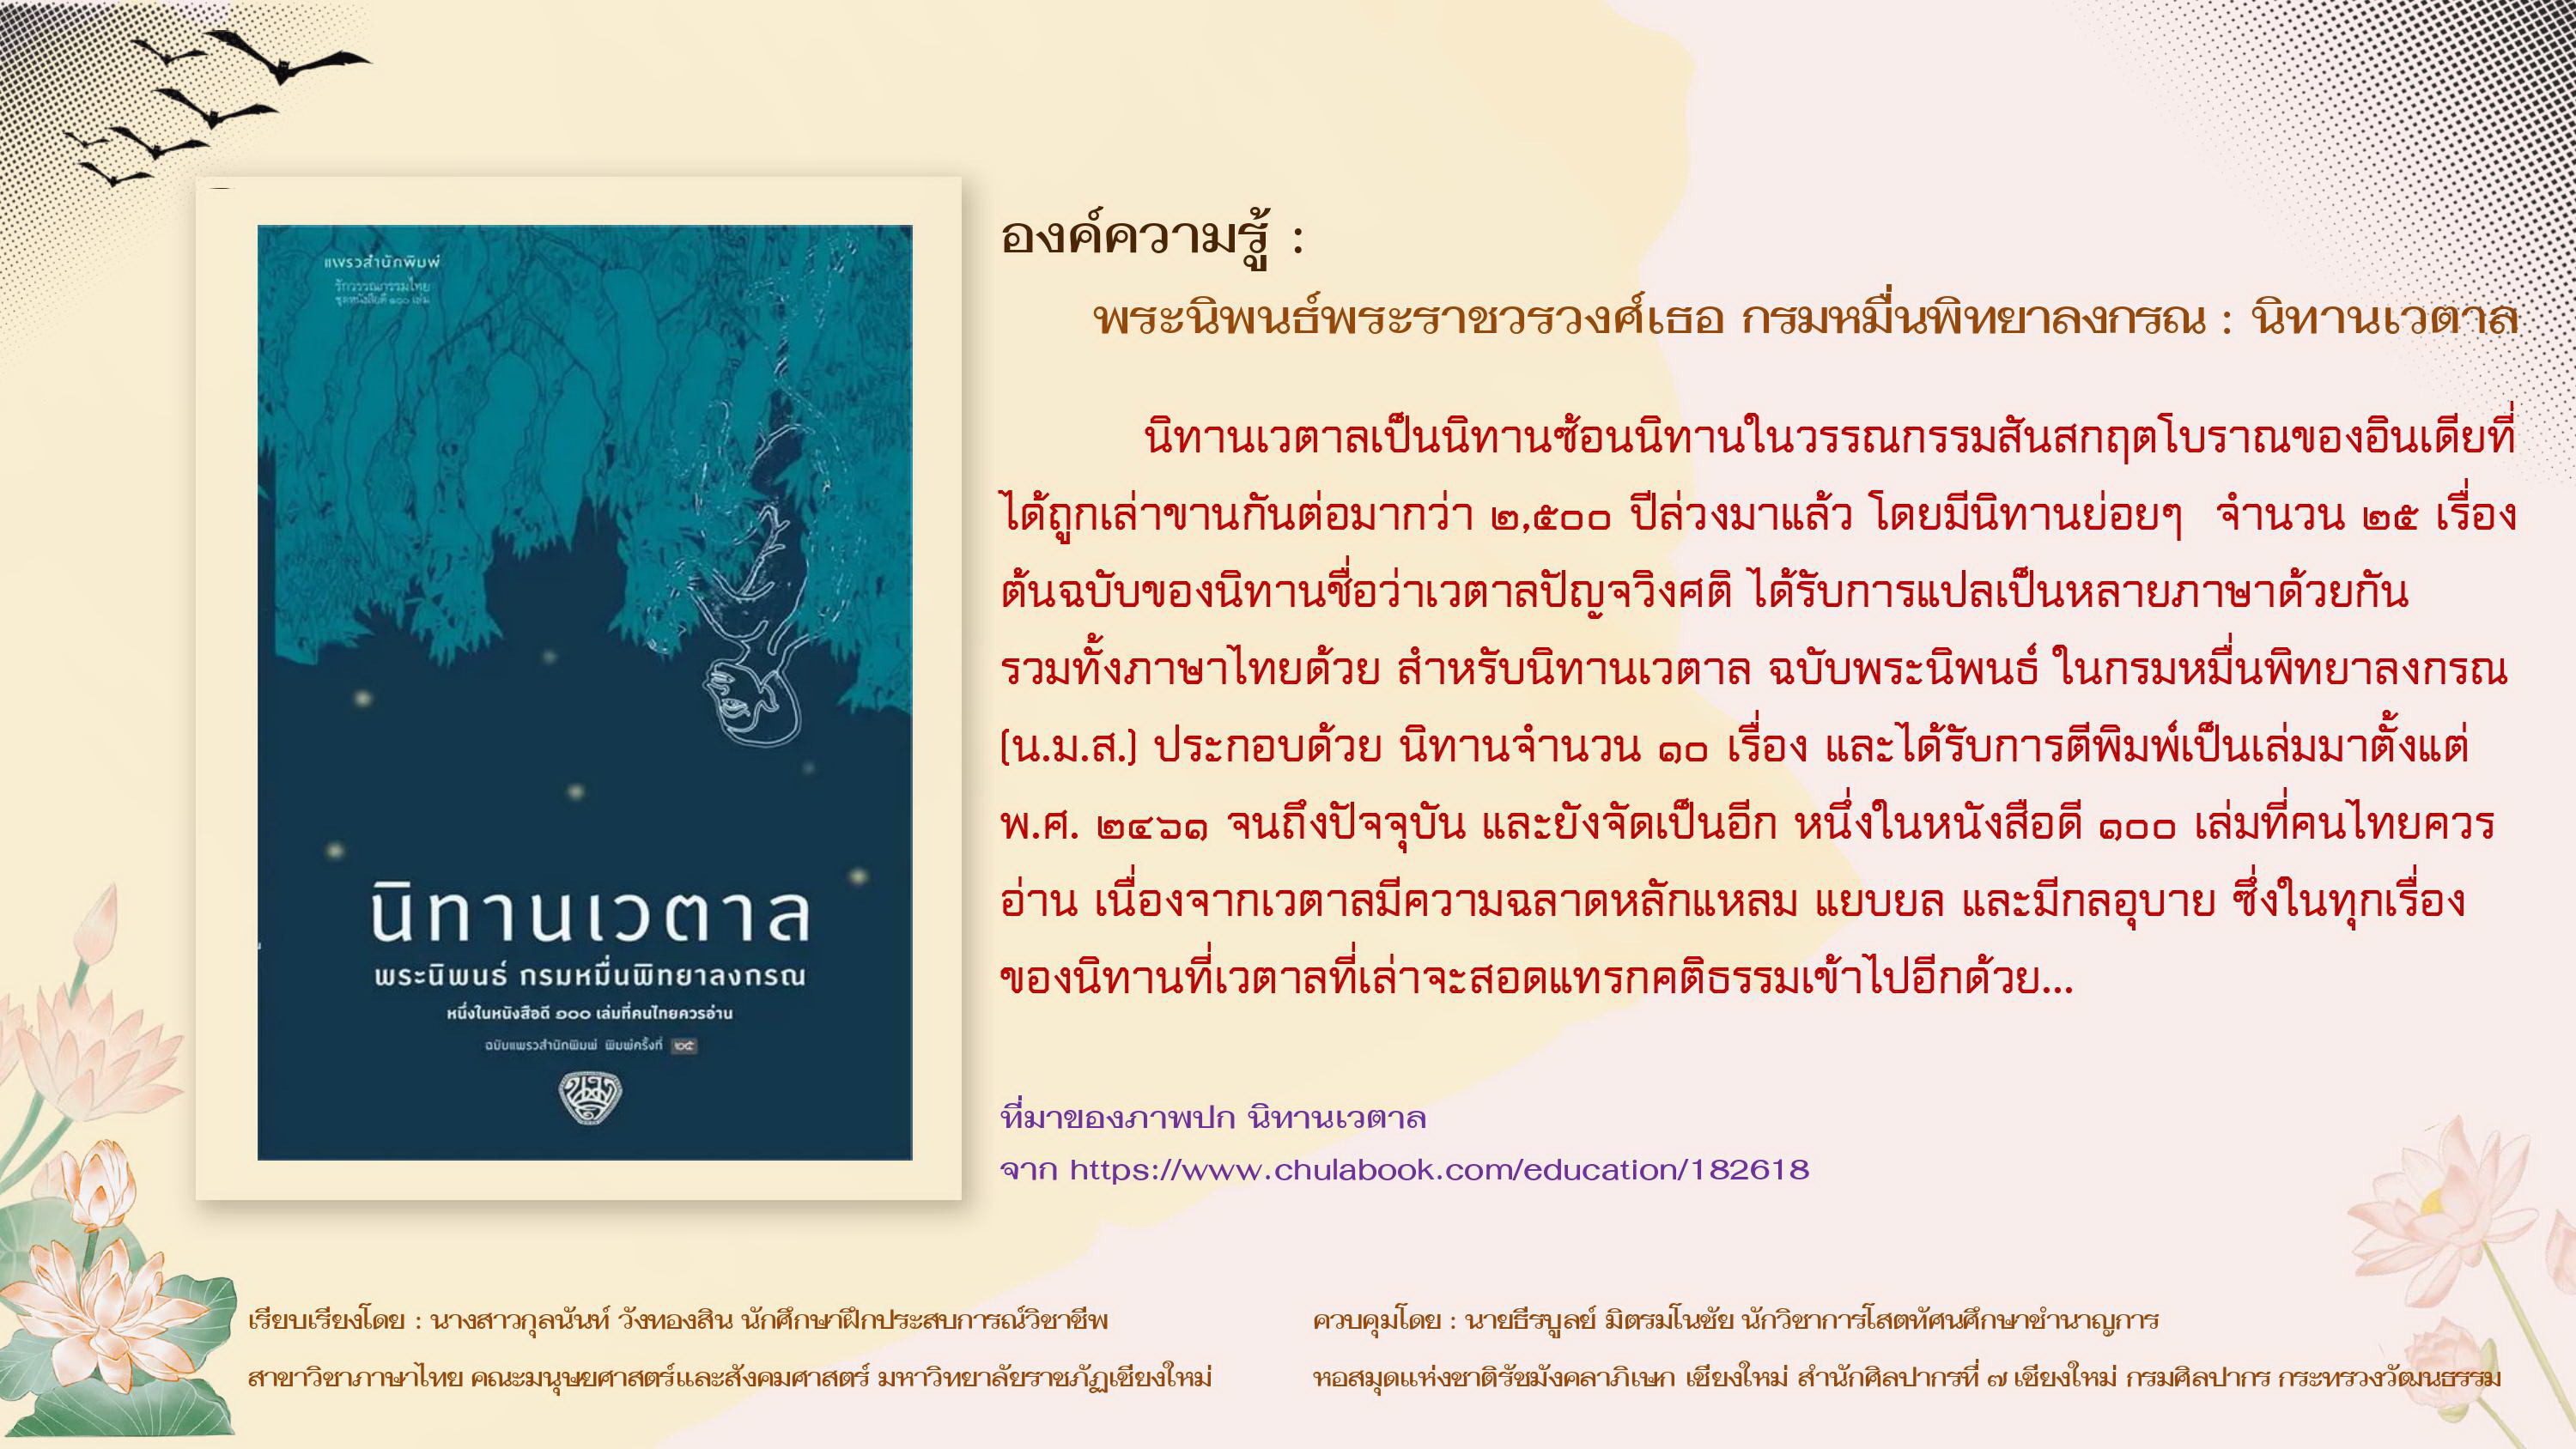

In [ ]:
from IPython.display import Image, Markdown
story_tales = '/content/Je55JmRtmkhgmkWf2G5qBsoK71TdJy51Ly0POYrG.jpg'
Image(story_tales)

See Image 2 (Electricity Bill)

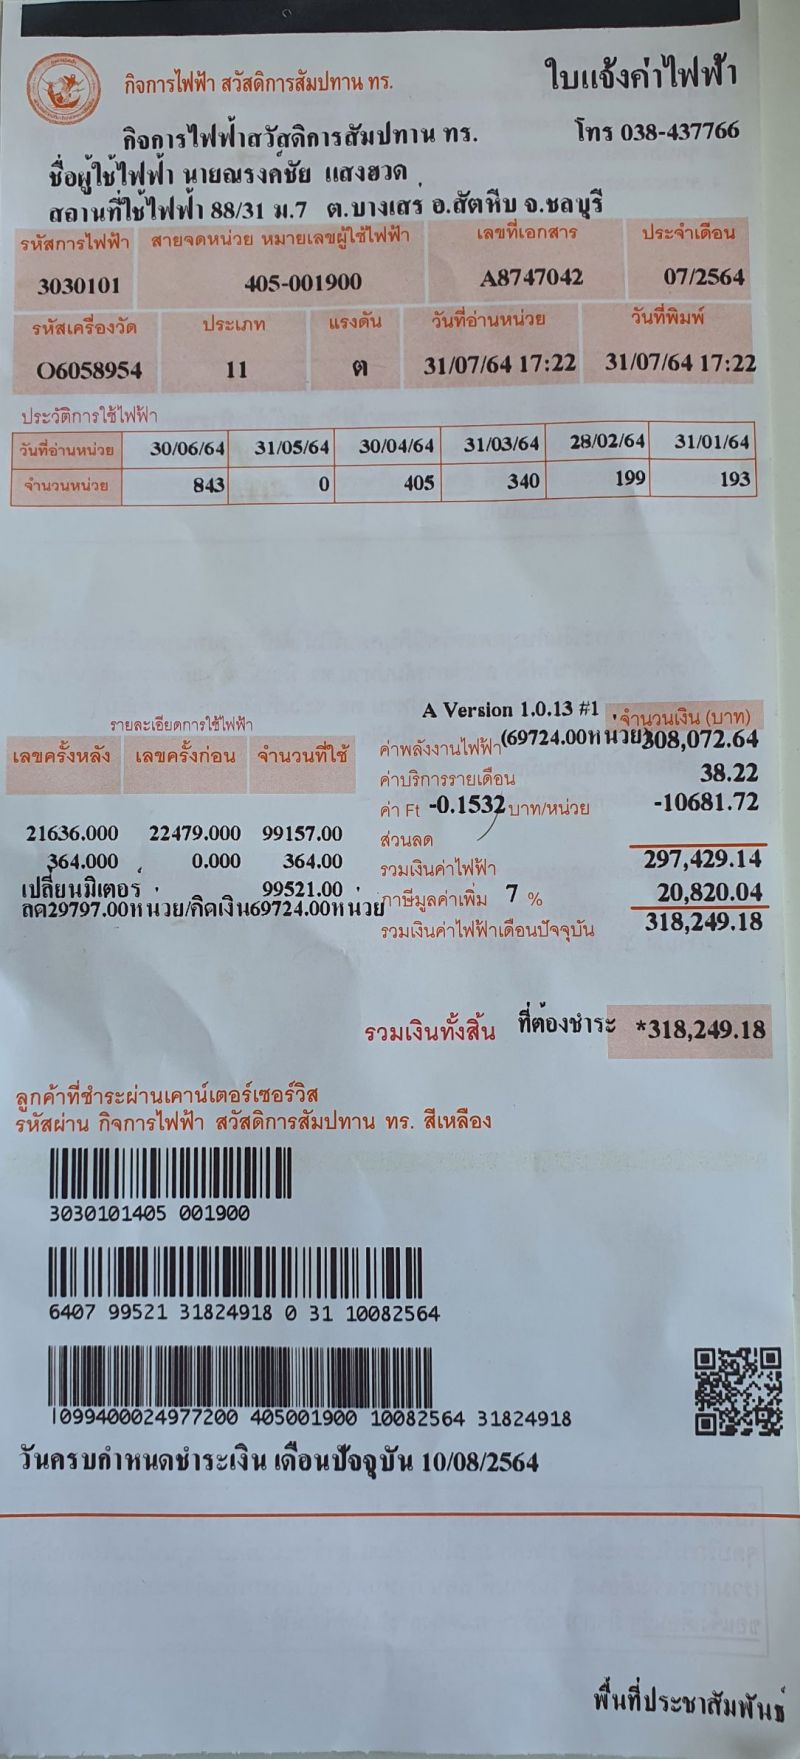

In [ ]:
electricity_bill = '/content/521538.jpg'
Image(electricity_bill)

Load PDF 1

In [ ]:
!wget https://web.reg.chula.ac.th/NewStudyFee_2563.pdf --no-check-certificate

--2026-02-07 05:24:18--  https://web.reg.chula.ac.th/NewStudyFee_2563.pdf
Resolving web.reg.chula.ac.th (web.reg.chula.ac.th)... 161.200.133.230
Connecting to web.reg.chula.ac.th (web.reg.chula.ac.th)|161.200.133.230|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2634565 (2.5M) [application/pdf]
Saving to: ‘NewStudyFee_2563.pdf’

NewStudyFee_2563.pd 100%[===================>]   2.51M  1.94MB/s    in 1.3s    

2026-02-07 05:24:20 (1.94 MB/s) - ‘NewStudyFee_2563.pdf’ saved [2634565/2634565]



Load PDF 2

In [ ]:
!wget https://www.rd.go.th/fileadmin/download/jortor/62896/pak1-24072568-listname1.pdf

--2026-02-07 05:24:22--  https://www.rd.go.th/fileadmin/download/jortor/62896/pak1-24072568-listname1.pdf
Resolving www.rd.go.th (www.rd.go.th)... 103.51.64.224
Connecting to www.rd.go.th (www.rd.go.th)|103.51.64.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746814 (729K) [application/pdf]
Saving to: ‘pak1-24072568-listname1.pdf’

pak1-24072568-listn 100%[===================>] 729.31K   794KB/s    in 0.9s    

2026-02-07 05:24:24 (794 KB/s) - ‘pak1-24072568-listname1.pdf’ saved [746814/746814]



## Method 1: via API

Note: The free tier has a rate limit of `2 requests per second` and `20 requests per minute`.

You can get an API key from https://playground.opentyphoon.ai/

In [ ]:
import os
from getpass import getpass
os.environ['TYPHOON_OCR_API_KEY'] = getpass('API Key : ')

API Key : ··········


Inference : Image 1 (Story / Tales)

In [ ]:
from typhoon_ocr import ocr_document

markdown_1 = ocr_document(
    pdf_or_image_path=story_tales,
    model = "typhoon-ocr",
)

Markdown(markdown_1) # Markdown printed or you can see the raw text by print(markdown_1)

# องค์ความรู้ :

## พระนิพนธ์พระราชวรวงศ์เธอ กรมหมื่นพิทยาลงกรณ : นิทานเวตาล

นิทานเวตาลเป็นนิทานซ้อนนิทานในวรรณกรรมสันสกฤตโบราณของอินเดียที่ได้ถูกเล่าขานกันต่อมากว่า ๒,๕๐๐ ปีล่วงมาแล้ว โดยมีนิทานย่อยๆ จำนวน ๒๕ เรื่อง ต้นฉบับของนิทานชื่อว่าเวตาลปัญจวิงศติ ได้รับการแปลเป็นหลายภาษาด้วยกัน (น.ม.ส.) ประกอบด้วย นิทานจำนวน ๑๐ เรื่อง และได้รับการตีพิมพ์เป็นเล่มมาตั้งแต่ พ.ศ. ๒๔๖๓ จนถึงปัจจุบัน และยังจัดเป็นอีกหนึ่งในหนังสือดี ๑๐๐ เล่มที่คนไทยควรอ่าน เนื่องจากเวตาลมีความฉลาดหลักแหลม แยบยล และมีกลอุบาย ซึ่งในทุกเรื่องของนิทานที่เวลาที่เล่าจะสอดแทรกคติธรรมเข้าไปอีกด้วย ...

ที่มาของภาพปก นิทานเวตาล
จาก https://www.chulabook.com/education/182618

เรียบเรียงโดย : นางสาวกุลนันท์ วังทองสิน นักศึกษาฝึกประสบการณ์วิชาชีพ
สาขาวิชาภาษาไทย คณะมนุษยศาสตร์และสังคมศาสตร์ มหาวิทยาลัยราชภัฏเชียงใหม่

ควบคุมโดย : นายธีรบูลย์ มิตรมโนชัย นักวิชาการโสตทัศนศึกษาชำนาญการ
หอสมุดแห่งชาติรัชมังคลาภิเษก เชียงใหม่ สำนักศิลปากร กระทรวงวัฒนธรรม

In [ ]:
print(markdown_1)

# องค์ความรู้ :

## พระนิพนธ์พระราชวรวงศ์เธอ กรมหมื่นพิทยาลงกรณ : นิทานเวตาล

นิทานเวตาลเป็นนิทานซ้อนนิทานในวรรณกรรมสันสกฤตโบราณของอินเดียที่ได้ถูกเล่าขานกันต่อมากว่า ๒,๕๐๐ ปีล่วงมาแล้ว โดยมีนิทานย่อยๆ จำนวน ๒๕ เรื่อง ต้นฉบับของนิทานชื่อว่าเวตาลปัญจวิงศติ ได้รับการแปลเป็นหลายภาษาด้วยกัน (น.ม.ส.) ประกอบด้วย นิทานจำนวน ๑๐ เรื่อง และได้รับการตีพิมพ์เป็นเล่มมาตั้งแต่ พ.ศ. ๒๔๖๓ จนถึงปัจจุบัน และยังจัดเป็นอีกหนึ่งในหนังสือดี ๑๐๐ เล่มที่คนไทยควรอ่าน เนื่องจากเวตาลมีความฉลาดหลักแหลม แยบยล และมีกลอุบาย ซึ่งในทุกเรื่องของนิทานที่เวลาที่เล่าจะสอดแทรกคติธรรมเข้าไปอีกด้วย ...

ที่มาของภาพปก นิทานเวตาล
จาก https://www.chulabook.com/education/182618

เรียบเรียงโดย : นางสาวกุลนันท์ วังทองสิน นักศึกษาฝึกประสบการณ์วิชาชีพ
สาขาวิชาภาษาไทย คณะมนุษยศาสตร์และสังคมศาสตร์ มหาวิทยาลัยราชภัฏเชียงใหม่

ควบคุมโดย : นายธีรบูลย์ มิตรมโนชัย นักวิชาการโสตทัศนศึกษาชำนาญการ
หอสมุดแห่งชาติรัชมังคลาภิเษก เชียงใหม่ สำนักศิลปากร กระทรวงวัฒนธรรม


Inference : Image 2 (Electricity Bill)

In [ ]:
markdown_2 = ocr_document(
    pdf_or_image_path=electricity_bill,
    model = "typhoon-ocr",
)

Markdown(markdown_2) # Markdown printed or you can see the raw text by print(markdown_2)

กิจการไฟฟ้า สวัสดิการสัมปทาน ทร.
ใบแจ้งค่าไฟฟ้า
โทร 038-437766

ชื่อผู้ใช้ไฟฟ้า นายณรงคชัย แสงฮวด
สถานที่ใช้ไฟฟ้า 88/31 ม.7 ต.บางเสร อ.สัตหีบ จ.ชลบุรี

<table><tr><td>รหัสการไฟฟ้า</td><td>สายจดหน่วย</td><td>หมายเลขผู้ใช้ไฟฟ้า</td><td>เลขที่เอกสาร</td><td>ประจำเดือน</td></tr><tr><td>3030101</td><td></td><td>405-001900</td><td>A8747042</td><td>07/2564</td></tr></table>

รหัสเครื่องวัด 06058954
ประเภท 11
แรงดัน ต
วันที่อ่านหน่วย 31/07/64 17:22
วันที่พิมพ์ 31/07/64 17:22

ประวัติการใช้ไฟฟ้า

<table><tr><td>วันที่อ่านหน่วย</td><td>30/06/64</td><td>31/05/64</td><td>30/04/64</td><td>31/03/64</td><td>28/02/64</td><td>31/01/64</td></tr><tr><td>จำนวนหน่วย</td><td>843</td><td>0</td><td>405</td><td>340</td><td>199</td><td>193</td></tr></table>

รายละเอียดการใช้ไฟฟ้า
A Version 1.0.13 #1 'จำนวนเงิน (บาท)
ค่าพลังงานไฟฟ้า 69724.00 หน่วย 308,072.64
ค่าบริการรายเดือน 38.22
ค่า Ft -0.1532 บาท/หน่วย -10681.72
ส่วนลด
รวมเงินค่าไฟฟ้า 297,429.14
ภาษีมูลค่าเพิ่ม 7 % 20,820.04
รวมเงินค่าไฟฟ้าเดือนปัจจุบัน 318,249.18

ลูกค้าที่ชำระผ่านเคาน์เตอร์เชอร์วิส
รหัสผ่าน กิจการไฟฟ้า สวัสดิการสัมปทาน ทร. สีเหลือง
3030101405 001900

รวมเงินทั้งสิ้น ที่ต้องชำระ *318,249.18

30407 99521 31824918 0 31 10082564

1099400024977200 405001900 10082564 31824918

วันครบกำหนดชำระเงิน เดือนปัจจุบัน 10/08/2564

พื้นที่ประชาสัมพันธ์

If you check the raw output, the table content will appear under the `<table>` tag.

In [ ]:
print(markdown_2)

กิจการไฟฟ้า สวัสดิการสัมปทาน ทร.
ใบแจ้งค่าไฟฟ้า
โทร 038-437766

ชื่อผู้ใช้ไฟฟ้า นายณรงคชัย แสงฮวด
สถานที่ใช้ไฟฟ้า 88/31 ม.7 ต.บางเสร อ.สัตหีบ จ.ชลบุรี

<table><tr><td>รหัสการไฟฟ้า</td><td>สายจดหน่วย</td><td>หมายเลขผู้ใช้ไฟฟ้า</td><td>เลขที่เอกสาร</td><td>ประจำเดือน</td></tr><tr><td>3030101</td><td></td><td>405-001900</td><td>A8747042</td><td>07/2564</td></tr></table>

รหัสเครื่องวัด 06058954
ประเภท 11
แรงดัน ต
วันที่อ่านหน่วย 31/07/64 17:22
วันที่พิมพ์ 31/07/64 17:22

ประวัติการใช้ไฟฟ้า

<table><tr><td>วันที่อ่านหน่วย</td><td>30/06/64</td><td>31/05/64</td><td>30/04/64</td><td>31/03/64</td><td>28/02/64</td><td>31/01/64</td></tr><tr><td>จำนวนหน่วย</td><td>843</td><td>0</td><td>405</td><td>340</td><td>199</td><td>193</td></tr></table>

รายละเอียดการใช้ไฟฟ้า
A Version 1.0.13 #1 'จำนวนเงิน (บาท)
ค่าพลังงานไฟฟ้า 69724.00 หน่วย 308,072.64
ค่าบริการรายเดือน 38.22
ค่า Ft -0.1532 บาท/หน่วย -10681.72
ส่วนลด
รวมเงินค่าไฟฟ้า 297,429.14
ภาษีมูลค่าเพิ่ม 7 % 20,820.04
รวมเงินค่าไฟฟ้าเดือนปัจจุบัน 318,

Inference : PDF (Student Fee - Chulalongkorn University Document)

In [ ]:
markdown_3 = ocr_document(
    pdf_or_image_path="NewStudyFee_2563.pdf",
    page_num=2 # Process page 2 of a PDF (default is 1, always 1 for images)
)

Markdown(markdown_3)

๒

"นิสิตคณะกลุ่มสังคมศาสตร์" หมายความว่า นิสิตคณะครุศาสตร์ คณะนิติศาสตร์ คณะนิเทศศาสตร์ คณะพาณิชยศาสตร์และการบัญชี คณะรัฐศาสตร์ คณะเศรษฐศาสตร์ สำนักวิชาทรัพยากรการเกษตร วิทยาลัยประชากรศาสตร์ สหสาขาวิชาการจัดการความเสี่ยงและภัยพิบัติ สหสาขาวิชาการโลจิสติกส์และโซ่อุปทาน สหสาขาวิชาการจัดการทางวัฒนธรรม สหสาขาวิชาการบริหารกิจการทางทะเล สหสาขาวิชาเภาหลีศึกษา สหสาขาวิชาพัฒนามนุษย์และสังคม สหสาขาวิชาภาษาอังกฤษเป็นภาษานานาชาติ สหสาขาวิชายุโรปศึกษา สหสาขาวิชาสิ่งแวดล้อมการพัฒนาและความยั่งยืน สหสาขาวิชาเอเชียตะวันออกเฉียงใต้ศึกษา และสหสาขาวิชาธุรกิจเทคโนโลยีและการจัดการทางนวัตกรรม

"นิสิตคณะกลุ่มมนุษยศาสตร์” หมายความว่า นิสิตคณะอักษรศาสตร์และคณะศิลปกรรมศาสตร์

"ชาวต่างประเทศ" หมายความว่า บุคคลที่ไม่ได้มีสัญชาติไทยตามกฎหมายว่าด้วยสัญชาติ

"ส่วนงานภายใน" หมายความว่า วิทยาลัย สถาบัน และส่วนงานที่เรียกชื่ออย่างอื่นที่ไม่ได้อยู่ในระบบทะเบียนของสำนักงานการทะเบียน

ข้อ ๕ อัตราค่าเล่าเรียนที่เรียกเก็บจากนิสิตระดับปริญญาตรี

(๑) ภาคการศึกษาต้นและภาคการศึกษาปลาย

<table><tr><td>(ก) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๑)</td><td>ภาคการศึกษาละ</td><td>๓๔,๐๐๐ บาท</td></tr><tr><td>(ข) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๒)</td><td>ภาคการศึกษาละ</td><td>๒๖,๕๐๐ บาท</td></tr><tr><td>(ค) นิสิตคณะกลุ่มวิทยาศาสตร์กายภาพ</td><td>ภาคการศึกษาละ</td><td>๒๕,๕๐๐ บาท</td></tr><tr><td>(ง) นิสิตคณะกลุ่มสังคมศาสตร์</td><td>ภาคการศึกษาละ</td><td>๒๑,๐๐๐ บาท</td></tr><tr><td>(จ) นิสิตคณะกลุ่มมนุษยศาสตร์</td><td>ภาคการศึกษาละ</td><td>๒๑,๐๐๐ บาท</td></tr></table>

(๒) ภาคฤดูร้อน

<table><tr><td>(ก) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๑)</td><td>ภาคการศึกษาละ</td><td>๘,๕๐๐ บาท</td></tr><tr><td>(ข) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๒)</td><td>ภาคการศึกษาละ</td><td>๖,๒๒๕ บาท</td></tr><tr><td>(ค) นิสิตคณะกลุ่มวิทยาศาสตร์กายภาพ</td><td>ภาคการศึกษาละ</td><td>๖,๓๗๕ บาท</td></tr><tr><td>(ง) นิสิตคณะกลุ่มสังคมศาสตร์</td><td>ภาคการศึกษาละ</td><td>๕,๒๕๐ บาท</td></tr><tr><td>(จ) นิสิตคณะกลุ่มมนุษยศาสตร์</td><td>ภาคการศึกษาละ</td><td>๕,๒๕๐ บาท</td></tr></table>

ข้อ ๖ อัตราค่าเล่าเรียนที่เรียกเก็บจากนิสิตหรือนักศึกษาระดับปริญญาตรีจากสถาบันอื่นเข้าศึกษาโดยไม่รับปริญญาหรือบุคคลภายนอกเข้าร่วมฟัง

(๑) ภาคการศึกษาต้นและภาคการศึกษาปลาย

<table><tr><td>(ก) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๑)</td><td>ภาคการศึกษาละ</td><td>๑๗,๐๐๐ บาท</td></tr><tr><td>(ข) นิสิตคณะกลุ่มวิทยาศาสตร์ชีวภาพ (๒)</td><td>ภาคการศึกษาละ</td><td>๑๓,๒๕๐ บาท</td></tr><tr><td>(ค) นิสิตคณะกลุ่มวิทยาศาสตร์กายภาพ</td><td>ภาคการศึกษาละ</td><td>๑๒,๗๕๐ บาท</td></tr><tr><td>(ง) นิสิตคณะกลุ่มสังคมศาสตร์</td><td>ภาคการศึกษาละ</td><td>๑๐,๕๐๐ บาท</td></tr><tr><td>(จ) นิสิตคณะกลุ่มมนุษยศาสตร์</td><td>ภาคการศึกษาละ</td><td>๑๐,๕๐๐ บาท</td></tr></table>

มหาวิทยาลัยราชภัฏมหาสารคาม

If you check the raw output, the table content will appear under the `<table>` tag.

In [ ]:
print(markdown_3)

๒

"นิสิตคณะกลุ่มสังคมศาสตร์" หมายความว่า นิสิตคณะครุศาสตร์ คณะนิติศาสตร์ คณะนิเทศศาสตร์ คณะพาณิชยศาสตร์และการบัญชี คณะรัฐศาสตร์ คณะเศรษฐศาสตร์ สำนักวิชาทรัพยากรการเกษตร วิทยาลัยประชากรศาสตร์ สหสาขาวิชาการจัดการความเสี่ยงและภัยพิบัติ สหสาขาวิชาการโลจิสติกส์และโซ่อุปทาน สหสาขาวิชาการจัดการทางวัฒนธรรม สหสาขาวิชาการบริหารกิจการทางทะเล สหสาขาวิชาเภาหลีศึกษา สหสาขาวิชาพัฒนามนุษย์และสังคม สหสาขาวิชาภาษาอังกฤษเป็นภาษานานาชาติ สหสาขาวิชายุโรปศึกษา สหสาขาวิชาสิ่งแวดล้อมการพัฒนาและความยั่งยืน สหสาขาวิชาเอเชียตะวันออกเฉียงใต้ศึกษา และสหสาขาวิชาธุรกิจเทคโนโลยีและการจัดการทางนวัตกรรม

"นิสิตคณะกลุ่มมนุษยศาสตร์” หมายความว่า นิสิตคณะอักษรศาสตร์และคณะศิลปกรรมศาสตร์

"ชาวต่างประเทศ" หมายความว่า บุคคลที่ไม่ได้มีสัญชาติไทยตามกฎหมายว่าด้วยสัญชาติ

"ส่วนงานภายใน" หมายความว่า วิทยาลัย สถาบัน และส่วนงานที่เรียกชื่ออย่างอื่นที่ไม่ได้อยู่ในระบบทะเบียนของสำนักงานการทะเบียน

ข้อ ๕ อัตราค่าเล่าเรียนที่เรียกเก็บจากนิสิตระดับปริญญาตรี

(๑) ภาคการศึกษาต้นและภาคการศึกษาปลาย

<table><tr><td>(ก) นิสิตคณะกลุ่มวิทยาศาสตร

Inference : PDF (Revenue Department Annoucement)

In [ ]:
markdown_4 = ocr_document(
    pdf_or_image_path="pak1-24072568-listname1.pdf",
    page_num=1 # Process page 2 of a PDF (default is 1, always 1 for images)
)

Markdown(markdown_4)

เอกสารแนบ ๑

รายชื่อผู้มีสิทธิเข้ารับการสอบสัมภาษณ์
ตามประกาศกรมสรรพากร เรื่อง รายชื่อผู้มีสิทธิเข้ารับการสอบสัมภาษณ์ กำหนดวัน เวลา สถานที่สอบ และระเบียบ
เกี่ยวกับการสอบ ในการสรรหาบุคคลเพื่อจัดจ้างเป็นลูกจ้างชั่วคราวในตำแหน่งนักวิชาการสรรพากร และเจ้าพนักงานธุรการ
ให้กับสำนักงานสรรพากรภาค ๑ และหน่วยงานในสังกัด
(แนบท้ายประกาศกรมสรรพากร ลงวันที่ ๒๔ กรกฎาคม พ.ศ. ๒๕๖๘)

๑. ตำแหน่งนักวิชาการสรรพากร จำนวน ๔๔๐ คน

<table><tr><td>ลำดับที่</td><td>เลขประจำตัวสอบ</td><td>ชื่อ - นามสกุล</td><td>หมายเหตุ</td></tr><tr><td>๑</td><td>๖๘๐๑๐๐๑</td><td>นางสาววสุนันท์ ดำช่วย</td><td></td></tr><tr><td>๒</td><td>๖๘๐๑๐๐๒</td><td>นางสาวอาทิตยา เถียรถาวร</td><td></td></tr><tr><td>๓</td><td>๖๘๐๑๐๐๓</td><td>นางสาวณิชชา ตันติอมรพงษ์</td><td></td></tr><tr><td>๔</td><td>๖๘๐๑๐๐๔</td><td>นายจีรวัฒน์ ลักษณา</td><td></td></tr><tr><td>๕</td><td>๖๘๐๑๐๐๕</td><td>นางสาววรมน เลิศสถิตย์</td><td></td></tr><tr><td>๖</td><td>๖๘๐๑๐๐๖</td><td>นางสาวนงภัส บำรุงฐาน</td><td></td></tr><tr><td>๗</td><td>๖๘๐๑๐๐๗</td><td>นางสาวณัฐกมล ภูกลิ่น</td><td></td></tr><tr><td>๘</td><td>๖๘๐๑๐๐๘</td><td>นายอชิระ ศรีอวยพรชัย</td><td></td></tr><tr><td>๙</td><td>๖๘๐๑๐๐๙</td><td>นางสาวอังคณา อ่อนเมือง</td><td></td></tr><tr><td>๑๐</td><td>๖๘๐๑๐๑๐</td><td>นางสาวศรัญญา ยศสุนทร</td><td></td></tr><tr><td>๑๑</td><td>๖๘๐๑๐๑๑</td><td>นายเทพประสิทธิ์ แจ้งบรรจบ</td><td></td></tr><tr><td>๑๒</td><td>๖๘๐๑๐๑๒</td><td>นางสาววิภาวรรณ นาควงษ์</td><td></td></tr><tr><td>๑๓</td><td>๖๘๐๑๐๑๓</td><td>นายวัชรวิชญ์ เสาศิริ</td><td></td></tr><tr><td>๑๔</td><td>๖๘๐๑๐๑๔</td><td>นางสาวจุไรวรรณ ชะมารัมย์</td><td></td></tr><tr><td>๑๕</td><td>๖๘๐๑๐๑๕</td><td>นางสาวบุราภา คงอุดหนุน</td><td></td></tr><tr><td>๑๖</td><td>๖๘๐๑๐๑๖</td><td>นางสาวมุขรินทร์ พิมอูบ</td><td></td></tr><tr><td>๑๗</td><td>๖๘๐๑๐๑๗</td><td>นางสาวรณัน วรชัยธนกุล</td><td></td></tr><tr><td>๑๘</td><td>๖๘๐๑๐๑๘</td><td>นางสาววริศรา สิงห์ใส</td><td></td></tr><tr><td>๑๙</td><td>๖๘๐๑๐๑๙</td><td>นางสาวปิยะณัฐ อ่อนไสว</td><td></td></tr><tr><td>๒๐</td><td>๖๘๐๑๐๒๐</td><td>นางสาวสุนิสา จันทา</td><td></td></tr><tr><td>๒๑</td><td>๖๘๐๑๐๒๑</td><td>นางสาวพรรณดา สีกลาง</td><td></td></tr><tr><td>๒๒</td><td>๖๘๐๑๐๒๓</td><td>นางสาวพิชญา คชแก้ว</td><td></td></tr><tr><td>๒๓</td><td>๖๘๐๑๐๒๔</td><td>นางสาวดลภา จตุรพิธพร</td><td></td></tr><tr><td>๒๔</td><td>๖๘๐๑๐๒๕</td><td>นางสาวมุขสุดา บุญวิจิตร</td><td></td></tr><tr><td>๒๕</td><td>๖๘๐๑๐๒๖</td><td>นายณัฐพล จันทร์จำรูญมาส</td><td></td></tr><tr><td>๒๖</td><td>๖๘๐๑๐๒๗</td><td>นางสาวชุติมา จันทร์จำรูญมาส</td><td></td></tr></table>

If you check the raw output, the table content will appear under the `<table>` tag.

In [ ]:
print(markdown_4)

เอกสารแนบ ๑

รายชื่อผู้มีสิทธิเข้ารับการสอบสัมภาษณ์
ตามประกาศกรมสรรพากร เรื่อง รายชื่อผู้มีสิทธิเข้ารับการสอบสัมภาษณ์ กำหนดวัน เวลา สถานที่สอบ และระเบียบ
เกี่ยวกับการสอบ ในการสรรหาบุคคลเพื่อจัดจ้างเป็นลูกจ้างชั่วคราวในตำแหน่งนักวิชาการสรรพากร และเจ้าพนักงานธุรการ
ให้กับสำนักงานสรรพากรภาค ๑ และหน่วยงานในสังกัด
(แนบท้ายประกาศกรมสรรพากร ลงวันที่ ๒๔ กรกฎาคม พ.ศ. ๒๕๖๘)

๑. ตำแหน่งนักวิชาการสรรพากร จำนวน ๔๔๐ คน

<table><tr><td>ลำดับที่</td><td>เลขประจำตัวสอบ</td><td>ชื่อ - นามสกุล</td><td>หมายเหตุ</td></tr><tr><td>๑</td><td>๖๘๐๑๐๐๑</td><td>นางสาววสุนันท์ ดำช่วย</td><td></td></tr><tr><td>๒</td><td>๖๘๐๑๐๐๒</td><td>นางสาวอาทิตยา เถียรถาวร</td><td></td></tr><tr><td>๓</td><td>๖๘๐๑๐๐๓</td><td>นางสาวณิชชา ตันติอมรพงษ์</td><td></td></tr><tr><td>๔</td><td>๖๘๐๑๐๐๔</td><td>นายจีรวัฒน์ ลักษณา</td><td></td></tr><tr><td>๕</td><td>๖๘๐๑๐๐๕</td><td>นางสาววรมน เลิศสถิตย์</td><td></td></tr><tr><td>๖</td><td>๖๘๐๑๐๐๖</td><td>นางสาวนงภัส บำรุงฐาน</td><td></td></tr><tr><td>๗</td><td>๖๘๐๑๐๐๗</td><td>นางสาวณัฐกมล ภู

## Method 2: via HuggingFace (GPU Required)
- Details: https://huggingface.co/typhoon-ai/typhoon-ocr1.5-2b
- Google colab provides a free-tier gpu (T4).
- You can switch from CPU to GPU via the `settings menu (top-right corner)` → `Change runtime type` → `T4 GPU`.

Required prompt.

**`Remark`**: This model is intended to be used with a **specific prompt only**; **it will not work** with any other prompts.


In [ ]:
prompt_ocrv2 = """
Extract all text from the image.

Instructions:
- Only return the clean Markdown.
- Do not include any explanation or extra text.
- You must include all information on the page.

Formatting Rules:
- Tables: Render tables using <table>...</table> in clean HTML format.
- Equations: Render equations using LaTeX syntax with inline ($...$) and block ($$...$$).
- Images/Charts/Diagrams: Wrap any clearly defined visual areas (e.g. charts, diagrams, pictures) in:

<figure>
Describe the image's main elements (people, objects, text), note any contextual clues (place, event, culture), mention visible text and its meaning, provide deeper analysis when relevant (especially for financial charts, graphs, or documents), comment on style or architecture if relevant, then give a concise overall summary. Describe in English.
</figure>

- Page Numbers: Wrap page numbers in <page_number>...</page_number> (e.g., <page_number>14</page_number>).
- Checkboxes: Use ☐ for unchecked and ☑ for checked boxes.
    """

 Required the image resizing function

In [ ]:
def resize(img, max_size):
        width, height = img.size
        # Only resize if one dimension exceeds max_size
        if width > 300 or height > 300:
            if width >= height:
                # scale width to max_size
                scale = max_size / float(width)
                new_size = (max_size, int(height * scale))
            else:
                # scale height to max_size
                scale = max_size / float(height)
                new_size = (int(width * scale), max_size)

            img = img.resize(new_size, Image.Resampling.LANCZOS)
            print(f"Original {width, height} ==> Resized {img.size}")
            return img
        else:
            return img  # no resize


Load the model to the instance.

In [ ]:
from transformers import AutoModelForImageTextToText, AutoProcessor
from PIL import Image

from huggingface_hub import login

model = AutoModelForImageTextToText.from_pretrained(
    "scb10x/typhoon-ocr1.5-2b", dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained("scb10x/typhoon-ocr1.5-2b")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.26G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/625 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/199 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

It's important to resize the image because the model is trained with a fixed image dimension of 1800 px.


In [ ]:
image = electricity_bill # @param ["story_tales","electricity_bill"] {"type":"raw"}
from PIL import Image

img = Image.open(image)
img = resize(img, 1800)

messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img,
                },
                {
                    "type": "text",
                    "text": prompt_ocrv2
                }
            ],
        }
    ]

Original (800, 1759) ==> Resized (818, 1800)


In [ ]:
# Preparation for inference
inputs = processor.apply_chat_template(
    messages,
    tokenize=True,
    add_generation_prompt=True,
    return_dict=True,
    return_tensors="pt"
)
inputs = inputs.to(model.device)

This may take a long time (~3 minutes per inference) on a T4 GPU.

In [ ]:
# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=10000)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

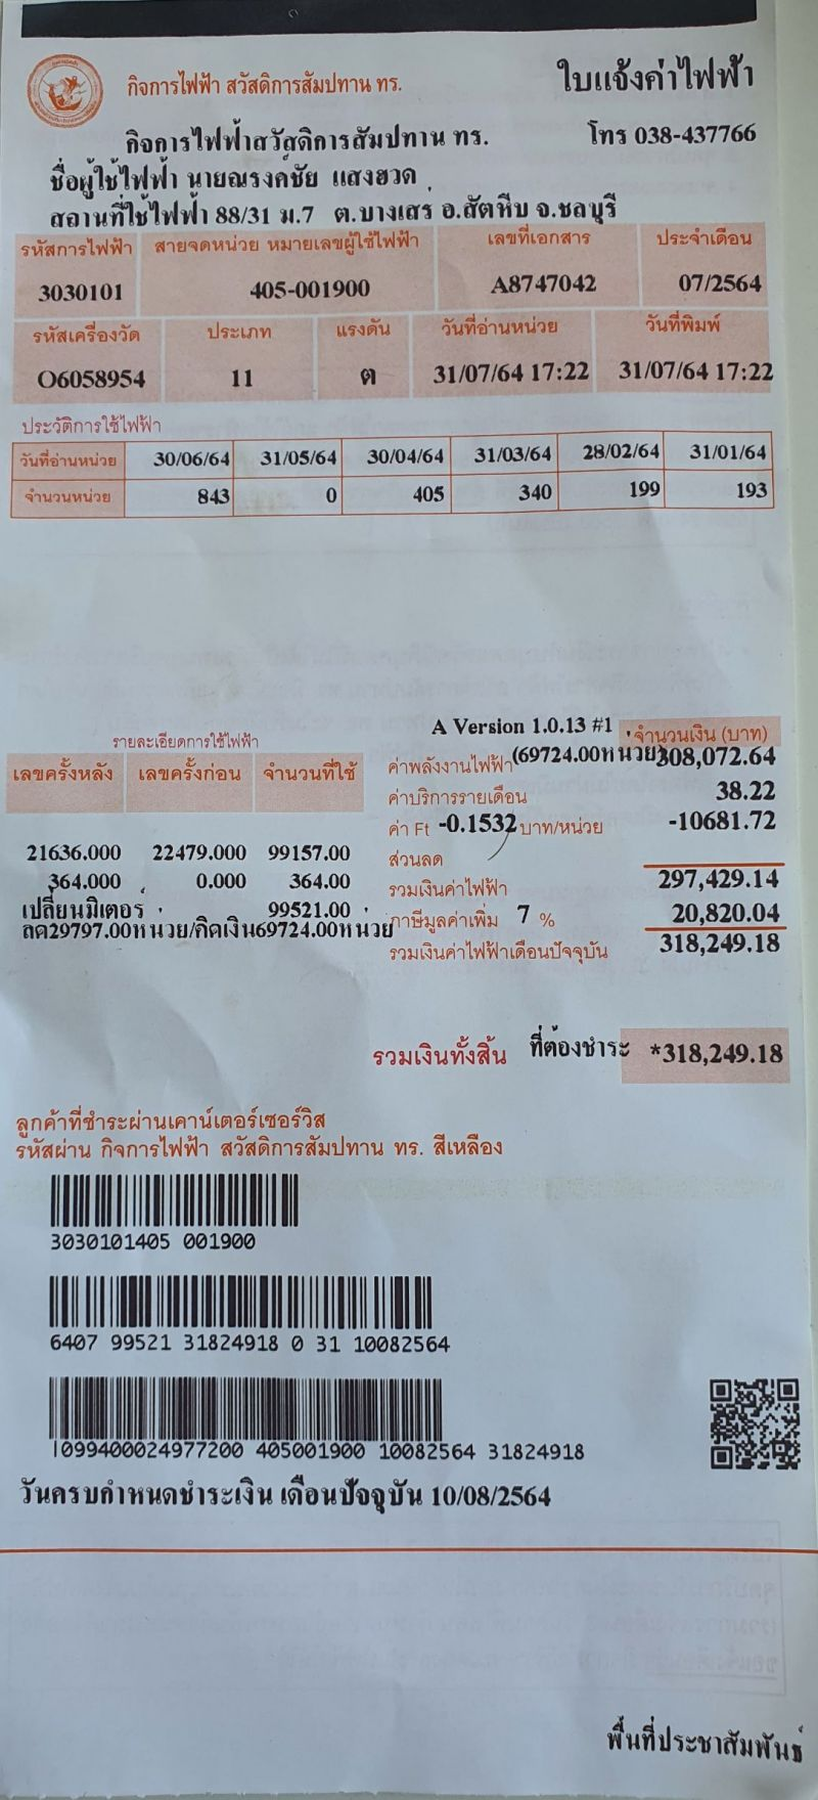

กิจการไฟฟ้า สวัสดิการสัมปทาน ทร.
ใบแจ้งค่าไฟฟ้า
กิจการไฟฟ้าสวัสดิการสัมปทาน ทร. โทร 038-437766
ชื่อผู้ใช้ไฟฟ้า นายณรงคชัย แสงฮวด
สถานที่ใช้ไฟฟ้า 88/31 ม.7 ต.บางเสร อ.สัตหีบ จ.ชลบุรี

<table><tr><td>รหัสการไฟฟ้า</td><td>สายจดหน่วย</td><td>หมายเลขผู้ใช้ไฟฟ้า</td><td>เลขที่เอกสาร</td><td>ประจำเดือน</td></tr><tr><td>3030101</td><td>405-001900</td><td>A8747042</td><td>07/2564</td></tr></table><table><tr><td>รหัสเครื่องวัด</td><td>ประเภท</td><td>แรงดัน</td><td>วันที่อ่านหน่วย</td><td>วันที่พิมพ์</td></tr><tr><td>O6058954</td><td>11</td><td>ต</td><td>31/07/64 17:22</td><td>31/07/64 17:22</td></tr></table>

ประวัติการใช้ไฟฟ้า
<table><tr><td>วันที่อ่านหน่วย</td><td>30/06/64</td><td>31/05/64</td><td>30/04/64</td><td>31/03/64</td><td>28/02/64</td><td>31/01/64</td></tr><tr><td>จำนวนหน่วย</td><td>843</td><td>0</td><td>405</td><td>340</td><td>199</td><td>193</td></tr></table>

รายละเอียดการใช้ไฟฟ้า
<table><tr><td>เลขครั้งหลัง</td><td>เลขครั้งก่อน</td><td>จำนวนที่ใช้</td></tr><tr><td>21636.000</td><td>22479.000</td><td>99157.00</td></tr><tr><td>364.000</td><td>0.000</td><td>364.00</td></tr><tr><td>เปลี่ยนมิเตอร์</td><td>99521.00</td><td></td></tr><tr><td>ลด29797.00หน่วย/คิดเงิน69724.00หน่วย</td><td></td><td></td></tr></table>

A Version 1.0.13 #1 'จำนวนเงิน (บาท)
ค่าพลังงานไฟฟ้า (69724.00หน่วย) 308,072.64
ค่าบริการรายเดือน 38.22
ค่า Ft -0.1532 บาท/หน่วย -10681.72
ส่วนลด
รวมเงินค่าไฟฟ้า 297,429.14
ภาษีมูลค่าเพิ่ม 7 % 20,820.04
รวมเงินค่าไฟฟ้าเดือนปัจจุบัน 318,249.18

รวมเงินทั้งสิ้น ที่ต้องชำระ *318,249.18

ลูกค้าที่ชำระผ่านเคาน์เตอร์เชอร์วิส
รหัสผ่าน กิจการไฟฟ้า สวัสดิการสัมปทาน ทร. สีเหลือง

<figure>
A barcode with the number 3030101405 001900 printed below it.
</figure>

3030101405 001900

<figure>
A barcode with the number 6407 99521 31824918 0 31 10082564 printed below it.
</figure>

6407 99521 31824918 0 31 10082564

<figure>
A barcode with the number 1099400024977200 405001900 10082564 31824918 printed below it.
</figure>

1099400024977200 405001900 10082564 31824918

วันครบกำหนดชำระเงิน เดือนปัจจุบัน 10/08/2564

พื้นที่ประชาสัมพันธ์

In [ ]:
from IPython.display import display, HTML, Markdown

display(img)
display(Markdown(output_text[0]))